<a href="https://colab.research.google.com/github/minhvn1433/Deep-learning-project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In this notebook, you will build four models and train it on the [UIT-VSMEC dataset](https://nlp.uit.edu.vn/datasets/). These use different layers after the embedding namely `Flatten`, `LSTM`, `GRU`, and `Conv1D`. You will compare the performance and see which architecture might be best for this particular dataset. Let's begin!😍😍😍

## Imports

You will first import common libraries that will be used throughout this notebook.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Embedding,
    Conv1D,
    Bidirectional,
    LSTM,
    GRU,
    Flatten,
    GlobalAveragePooling1D,
    Dense,
    Dropout,
)

## Load and Prepare the Dataset

First, you will load the `UIT-VSMEC` dataset and extract the contents into lists.

In [2]:
# Load the xlsx file
train_data = pd.read_excel('train.xlsx')
valid_data = pd.read_excel('valid.xlsx')
test_data = pd.read_excel('test.xlsx')
display(train_data)

# Initialize the training sentences and labels list
training_sentences = train_data['Sentence'].tolist()
training_labels = train_data['Emotion'].tolist()

# Initialize the validation sentences and labels list
validation_sentences = valid_data['Sentence'].tolist()
validation_labels = valid_data['Emotion'].tolist()

# Initialize the testing sentences and labels list
testing_sentences = test_data['Sentence'].tolist()
testing_labels = test_data['Emotion'].tolist()

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
5543,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,Other,nhìn mặt héo queo luôn
5545,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,Enjoyment,thích thân hình boss rồi nhan 😌


You will then convert the labels lists into numerical values.

In [3]:
# Initialize the LabelEncoder class
label_encoder = LabelEncoder()

# Convert the training labels into numerical values
training_labels = label_encoder.fit_transform(training_labels)
training_labels = np.array(training_labels)

# Convert the validation labels into numerical values
validation_labels = label_encoder.fit_transform(validation_labels)
validation_labels = np.array(validation_labels)

# Convert the testing labels into numerical values
testing_labels = label_encoder.fit_transform(testing_labels)
testing_labels = np.array(testing_labels)

Next, you will generate the vocabulary and padded sequences.

In [4]:
# Parameters
vocab_size = 5000
max_length = 120
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the validation sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Plot Ultility

Before you define the models, you will define the function below so you can easily visualize the accuracy and loss history after training.

In [5]:
# Plot Ultility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## Model 1: Flatten

First up is simply using a `Flatten` layer after the embedding. Its main advantage is that it is very fast to train. Observe the results below.

In [6]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
inputs = Input(shape=(max_length,), dtype='int32')
x = Embedding(vocab_size, embedding_dim)(inputs)
x = Flatten()(x)
x = Dense(dense_dim, activation='relu')(x)
outputs = Dense(7, activation='softmax')(x)
model_flatten = Model(inputs=inputs, outputs=outputs)

# Set the training parameters
model_flatten.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding (Embedding)       (None, 120, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 7)                 49        
                                                                 
Total params: 91575 (357.71 KB)
Trainable params: 91575 (357.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Train the model
history_flatten = model_flatten.fit(
    training_padded,
    training_labels,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(validation_padded, validation_labels),
    shuffle=True,
    verbose=2,
)

Epoch 1/10
44/44 - 13s - loss: 1.8565 - accuracy: 0.2174 - val_loss: 1.8108 - val_accuracy: 0.3120 - 13s/epoch - 290ms/step
Epoch 2/10
44/44 - 5s - loss: 1.7892 - accuracy: 0.2891 - val_loss: 1.7514 - val_accuracy: 0.3149 - 5s/epoch - 103ms/step
Epoch 3/10
44/44 - 3s - loss: 1.7370 - accuracy: 0.3079 - val_loss: 1.7112 - val_accuracy: 0.3309 - 3s/epoch - 68ms/step
Epoch 4/10
44/44 - 3s - loss: 1.6660 - accuracy: 0.3616 - val_loss: 1.6678 - val_accuracy: 0.3542 - 3s/epoch - 67ms/step
Epoch 5/10
44/44 - 3s - loss: 1.5820 - accuracy: 0.3830 - val_loss: 1.6195 - val_accuracy: 0.3659 - 3s/epoch - 58ms/step
Epoch 6/10
44/44 - 2s - loss: 1.4910 - accuracy: 0.4108 - val_loss: 1.5920 - val_accuracy: 0.3776 - 2s/epoch - 44ms/step
Epoch 7/10
44/44 - 1s - loss: 1.4157 - accuracy: 0.4340 - val_loss: 1.5797 - val_accuracy: 0.3907 - 1s/epoch - 25ms/step
Epoch 8/10
44/44 - 1s - loss: 1.3458 - accuracy: 0.4638 - val_loss: 1.5832 - val_accuracy: 0.3863 - 1s/epoch - 27ms/step
Epoch 9/10
44/44 - 1s - loss

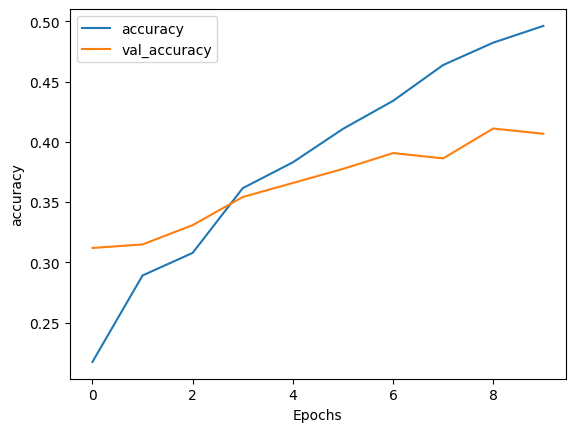

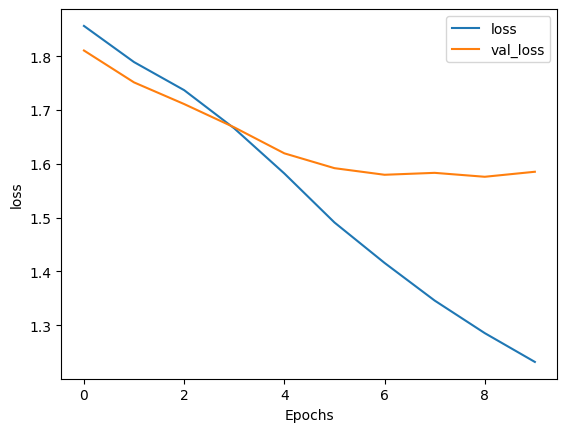

In [8]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

## Model 2: LSTM

Next, you will use an LSTM. This is slower to train but useful in applications where the order of the tokens is important.

In [9]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
inputs = Input(shape=(max_length,), dtype='int32')
x = Embedding(vocab_size, embedding_dim)(inputs)
x = Bidirectional(LSTM(lstm_dim))(x)
x = Dense(dense_dim, activation='relu')(x)
outputs = Dense(7, activation='softmax')(x)
model_lstm = Model(inputs=inputs, outputs=outputs)

# Set the training parameters
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 120, 16)           80000     
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 7)                 49        
                                                                 
Total params: 92983 (363.21 KB)
Trainable params: 92983 (363.21 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [10]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(
    training_padded,
    training_labels,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(validation_padded, validation_labels),
    shuffle=True,
    verbose=2,
)

Epoch 1/10
44/44 - 9s - loss: 1.9149 - accuracy: 0.2522 - val_loss: 1.8764 - val_accuracy: 0.3120 - 9s/epoch - 204ms/step
Epoch 2/10
44/44 - 4s - loss: 1.8485 - accuracy: 0.2951 - val_loss: 1.7953 - val_accuracy: 0.3513 - 4s/epoch - 99ms/step
Epoch 3/10
44/44 - 3s - loss: 1.8272 - accuracy: 0.3266 - val_loss: 1.7706 - val_accuracy: 0.3149 - 3s/epoch - 58ms/step
Epoch 4/10
44/44 - 2s - loss: 1.6969 - accuracy: 0.3690 - val_loss: 1.6819 - val_accuracy: 0.3732 - 2s/epoch - 55ms/step
Epoch 5/10
44/44 - 2s - loss: 1.6055 - accuracy: 0.3873 - val_loss: 1.6519 - val_accuracy: 0.3805 - 2s/epoch - 36ms/step
Epoch 6/10
44/44 - 1s - loss: 1.5356 - accuracy: 0.4036 - val_loss: 1.6227 - val_accuracy: 0.3848 - 1s/epoch - 27ms/step
Epoch 7/10
44/44 - 2s - loss: 1.4774 - accuracy: 0.4173 - val_loss: 1.6111 - val_accuracy: 0.3892 - 2s/epoch - 37ms/step
Epoch 8/10
44/44 - 2s - loss: 1.4113 - accuracy: 0.4326 - val_loss: 1.6047 - val_accuracy: 0.4096 - 2s/epoch - 42ms/step
Epoch 9/10
44/44 - 1s - loss: 1

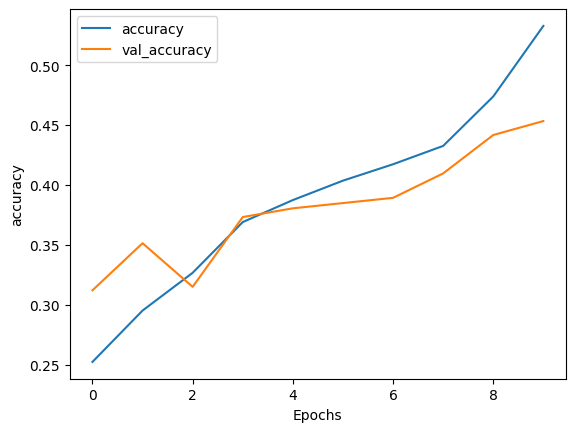

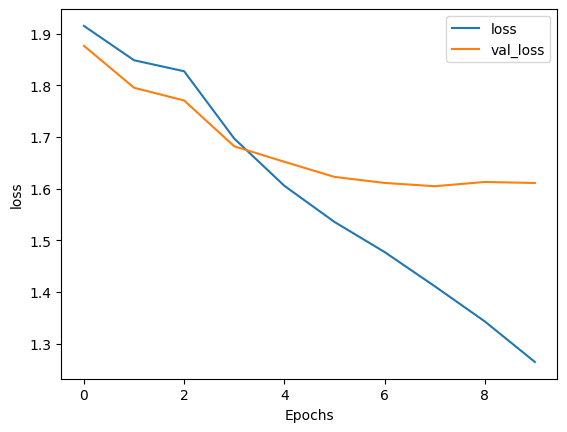

In [11]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

## Model 3: GRU

The *Gated Recurrent Unit* or [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster.

In [12]:
# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
inputs = Input(shape=(max_length,), dtype='int32')
x = Embedding(vocab_size, embedding_dim)(inputs)
x = Bidirectional(GRU(gru_dim))(x)
x = Dense(dense_dim, activation='relu')(x)
outputs = Dense(7, activation='softmax')(x)
model_gru = Model(inputs=inputs, outputs=outputs)

# Set the training parameters
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 120, 16)           80000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 7)                 49        
                                                                 
Total params: 90039 (351.71 KB)
Trainable params: 90039 (351.71 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [13]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Train the model
history_gru = model_gru.fit(
    training_padded,
    training_labels,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(validation_padded, validation_labels),
    shuffle=True,
    verbose=2,
)

Epoch 1/10
44/44 - 9s - loss: 1.9271 - accuracy: 0.1835 - val_loss: 1.8874 - val_accuracy: 0.1968 - 9s/epoch - 210ms/step
Epoch 2/10
44/44 - 3s - loss: 1.8802 - accuracy: 0.2587 - val_loss: 1.7991 - val_accuracy: 0.3120 - 3s/epoch - 74ms/step
Epoch 3/10
44/44 - 3s - loss: 1.7617 - accuracy: 0.3044 - val_loss: 1.7050 - val_accuracy: 0.3280 - 3s/epoch - 63ms/step
Epoch 4/10
44/44 - 3s - loss: 1.6321 - accuracy: 0.3590 - val_loss: 1.6570 - val_accuracy: 0.3688 - 3s/epoch - 59ms/step
Epoch 5/10
44/44 - 2s - loss: 1.5433 - accuracy: 0.4075 - val_loss: 1.6745 - val_accuracy: 0.3673 - 2s/epoch - 41ms/step
Epoch 6/10
44/44 - 2s - loss: 1.4740 - accuracy: 0.4495 - val_loss: 1.6335 - val_accuracy: 0.3965 - 2s/epoch - 37ms/step
Epoch 7/10
44/44 - 1s - loss: 1.3809 - accuracy: 0.4881 - val_loss: 1.6379 - val_accuracy: 0.4169 - 1s/epoch - 24ms/step
Epoch 8/10
44/44 - 1s - loss: 1.3073 - accuracy: 0.5094 - val_loss: 1.6602 - val_accuracy: 0.4067 - 1s/epoch - 25ms/step
Epoch 9/10
44/44 - 1s - loss: 1

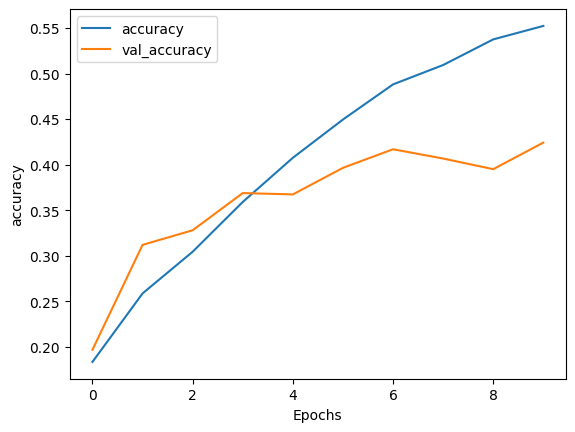

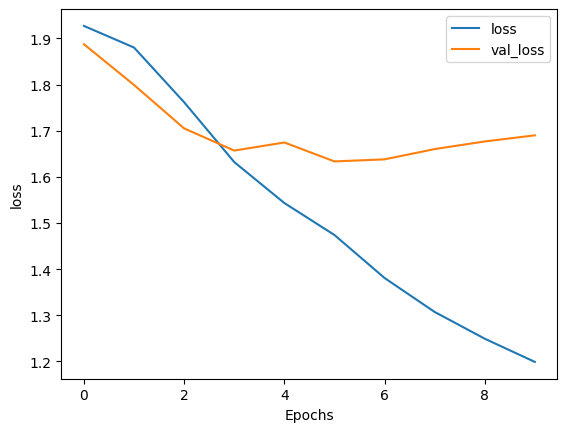

In [14]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

## Model 4: Convolution

Lastly, you will use a convolution layer to extract features from your dataset. You will append a [GlobalAveragePooling1d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) layer to reduce the results before passing it on to the dense layers. Like the model with `Flatten`, this also trains much faster than the ones using RNN layers like `LSTM` and `GRU`.

In [15]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
inputs = Input(shape=(max_length,), dtype='int32')
x = Embedding(vocab_size, embedding_dim)(inputs)
x = Conv1D(filters, kernel_size, activation='relu')(x)
x = GlobalAveragePooling1D()(x)
x = Dense(dense_dim, activation='relu')(x)
outputs = Dense(7, activation='softmax')(x)
model_conv = Model(inputs=inputs, outputs=outputs)

# Set the training parameters
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 120, 16)           80000     
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 7)                 49        
                                                           

In [16]:
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(
    training_padded,
    training_labels,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(validation_padded, validation_labels),
    shuffle=True,
    verbose=2,
)

Epoch 1/10
44/44 - 10s - loss: 1.8634 - accuracy: 0.2758 - val_loss: 1.7514 - val_accuracy: 0.3120 - 10s/epoch - 224ms/step
Epoch 2/10
44/44 - 3s - loss: 1.7746 - accuracy: 0.2810 - val_loss: 1.7416 - val_accuracy: 0.3120 - 3s/epoch - 62ms/step
Epoch 3/10
44/44 - 3s - loss: 1.7622 - accuracy: 0.2841 - val_loss: 1.7244 - val_accuracy: 0.3192 - 3s/epoch - 64ms/step
Epoch 4/10
44/44 - 1s - loss: 1.7260 - accuracy: 0.3223 - val_loss: 1.6860 - val_accuracy: 0.3630 - 1s/epoch - 29ms/step
Epoch 5/10
44/44 - 2s - loss: 1.6652 - accuracy: 0.3563 - val_loss: 1.6517 - val_accuracy: 0.3776 - 2s/epoch - 36ms/step
Epoch 6/10
44/44 - 1s - loss: 1.6085 - accuracy: 0.3738 - val_loss: 1.6215 - val_accuracy: 0.3790 - 1s/epoch - 29ms/step
Epoch 7/10
44/44 - 1s - loss: 1.5530 - accuracy: 0.3917 - val_loss: 1.6020 - val_accuracy: 0.3805 - 968ms/epoch - 22ms/step
Epoch 8/10
44/44 - 0s - loss: 1.5090 - accuracy: 0.4034 - val_loss: 1.5961 - val_accuracy: 0.3863 - 456ms/epoch - 10ms/step
Epoch 9/10
44/44 - 1s -

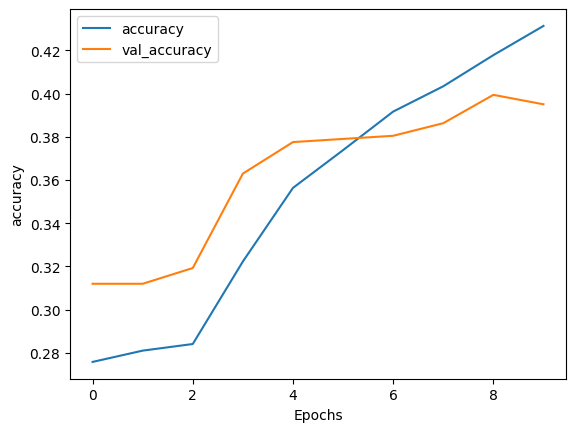

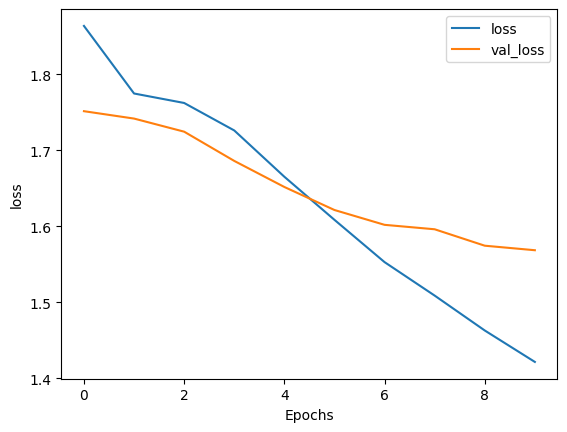

In [17]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')